**PHÂN LOẠI BỆNH ĐÁI THÁO ĐƯỜNG**

**1. Định nghĩa vấn đề (Define Problem)**


*   **Mô tả**\
\- Bộ dữ liệu Pima Indians Diabetes gồm thông tin lâm sàng và cận lâm sàng của phụ nữ người da đỏ Pima từ 21 tuổi trở lên.\
\- Mục tiêu là dự đoán khả năng một bệnh nhân có bị đái tháo đường type 2 hay không dựa trên các chỉ số y tế.
*   **Dữ liệu vào**\
\- Pregnancies: số lần mang thai\
\- Glucose: nồng độ glucose huyết tương sau 2h (mg/dL)\
\- BloodPressure: huyết áp tâm trương (mm Hg)\
\- SkinThickness: độ dày nếp gấp da (mm)\
\- Insulin: nồng độ insulin huyết thanh (μU/mL)\
\- BMI: chỉ số khối cơ thể (kg/m²)\
\- DiabetesPedigreeFunction: chỉ số di truyền nguy cơ tiểu đường\
\- Age: tuổi (năm)
*  **Kết quả**\
\- 0 = Không mắc bệnh đái tháo đường\
\- 1 = Mắc bệnh đái tháo đường

**2. Chuẩn bị vấn đề (Prepare Problem)**

**2.1 Khai báo thư viện (Load Libraries)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
)

**2.2 Đọc dữ liệu (Load Dataset)**

In [ ]:
data_path = "/content/drive/MyDrive/Data_Analysis/Tuần 3/pima_diabetes_header.csv"
df_dataset = pd.read_csv(data_path)

print("Kích thước dữ liệu:", df_dataset.shape)
display(df_dataset.head())
df_dataset.info()


Kích thước dữ liệu: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**3. Phân tích dữ liệu (Analyze Data)**

**3.1. Thống kê mô tả (Descriptive Statistics)**

**(1) Hiển thị thông tin về dữ liệu**\
\- Kích thước dữ liệu\
\- 5 dòng đầu tiên và 5 dòng cuối của bảng dữ liệu\
\- Thông tin chi tiết\
\- Thống kê cơ bản

In [ ]:
print("Kích thước dữ liệu:", df_dataset.shape)
print("\n5 dòng đầu:")
display(df_dataset.head())
print("\n5 dòng cuối:")
display(df_dataset.tail())
print("\nThông tin chi tiết:")
df_dataset.info()


Kích thước dữ liệu: (768, 9)

5 dòng đầu:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



5 dòng cuối:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0



Thông tin chi tiết:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Nhận xét**
- Dữ liệu có 8 thuộc tính dùng để phân lớp: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age.
- Đơn vị đo không hoàn toàn đồng nhất: Glucose mg/dL, BloodPressure mm Hg, SkinThickness mm, Insulin μU/mL, BMI kg/m², các cột còn lại không có đơn vị.
- Tổng số dòng dữ liệu là 768.
- Nhãn phân lớp nằm ở cột Outcome với 2 giá trị: 0 và 1.
- Phân bố lớp thường lệch: số mẫu Outcome = 0 nhiều hơn Outcome = 1.
- Lưu ý chất lượng dữ liệu: một số cột có giá trị 0 mang ý nghĩa thiếu dữ liệu thực tế như Glucose, BloodPressure, SkinThickness, Insulin, BMI. Khi tiền xử lý nên thay 0 bằng NaN rồi xử lý tiếp.

**(2) Kiểm tra tính toàn vẹn của dữ liệu**

- Dữ liệu có bị trùng lặp không? Hiển thị dòng bị vi phạm.\
- Dữ liệu có tồn tại giá trị Null không? Hiển thị dòng bị vi phạm.\
- Dữ liệu có tồn tại giá trị NaN không? Hiển thị dòng bị vi phạm.

In [ ]:
# Kiểm tra tính toàn vẹn của dữ liệu Pima Diabetes

# Có giá trị Null không?
has_null = df_dataset.isnull().sum().any()

# Có giá trị NaN không?
has_nan = df_dataset.isna().sum().any()

# Có dòng trùng lặp không?
n_duplicated = df_dataset.duplicated().sum()

print("Tính toàn vẹn dữ liệu:")
print(f"+ Có giá trị Null: {has_null}")
print(f"+ Có giá trị NaN: {has_nan}")
print(f"+ Số dòng trùng lặp: {n_duplicated}")

# Nếu có Null → hiển thị các dòng có Null
if has_null:
    display(df_dataset[df_dataset.isnull().any(axis=1)])

# Nếu có NaN → hiển thị các dòng có NaN
if has_nan:
    display(df_dataset[df_dataset.isna().any(axis=1)])

# Nếu có dòng trùng → hiển thị chi tiết các dòng bị trùng
if n_duplicated > 0:
    display(df_dataset[df_dataset.duplicated()])


Tính toàn vẹn dữ liệu:
+ Có giá trị Null: False
+ Có giá trị NaN: False
+ Số dòng trùng lặp: 0


**(3) Các tính chất thống kê trên dữ liệu số**

In [ ]:
description = df_dataset.describe().T
display(description)

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


**Nhận xét**
- Dữ liệu có 8 thuộc tính đầu vào: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age.
- Đơn vị đo không đồng nhất: Glucose: mg/dL; BloodPressure: mmHg; SkinThickness: mm; Insulin: μU/mL; BMI: kg/m²; các cột còn lại không đơn vị.
- Quy mô dữ liệu: 768 dòng, 9 cột

**(4) Tần số xuất hiện (Distribution) trên dữ liệu phân lớp (Outcome)**

In [ ]:
df_dataset["Outcome"].value_counts()

,count
Outcome,
0,500
1,268


**Nhận xét**
1.   Dữ liệu cần phân loại thành 2 lớp:
- 0: không mắc bệnh tiểu đường.
- 1: mắc bệnh tiểu đường.
2.   Các lớp không cân bằng: số mẫu lớp 0 (khỏe mạnh) nhiều hơn lớp 1 (bệnh nhân).
3. Cần lưu ý đến vấn đề imbalanced dataset trong bước huấn luyện mô hình.



**(5) Mối tương quan giữa các tính chất (Correlations)**



1.   Mục tiêu: Xem xét mối quan hệ tuyến tính giữa các thuộc tính trong bộ dữ liệu để phát hiện những cặp biến có tương quan mạnh, tránh trùng lặp thông tin và hỗ trợ việc chọn đặc trưng.
2.   Phương pháp: Sử dụng hệ số tương quan Pearson để đo lường.
- r ≈ 1 hoặc r ≈ -1: tương quan mạnh (dương/âm).
- r ≈ 0: hầu như không có tương quan tuyến tính.
3. Kết quả:
- Glucose có tương quan khá cao với Outcome (người có mức glucose cao dễ mắc tiểu đường hơn).
- BMI và SkinThickness có mức tương quan vừa phải (cùng phản ánh tình trạng mỡ cơ thể).
- Các thuộc tính còn lại nhìn chung không có tương quan quá cao, do đó ít gây vấn đề trùng lặp thông tin.
4. Kết luận: Bộ dữ liệu Pima Diabetes không xuất hiện multicollinearity quá mạnh. Tuy nhiên, vẫn cần lưu ý những cặp có tương quan trung bình–cao khi xây dựng mô hình hồi quy hoặc logistic.


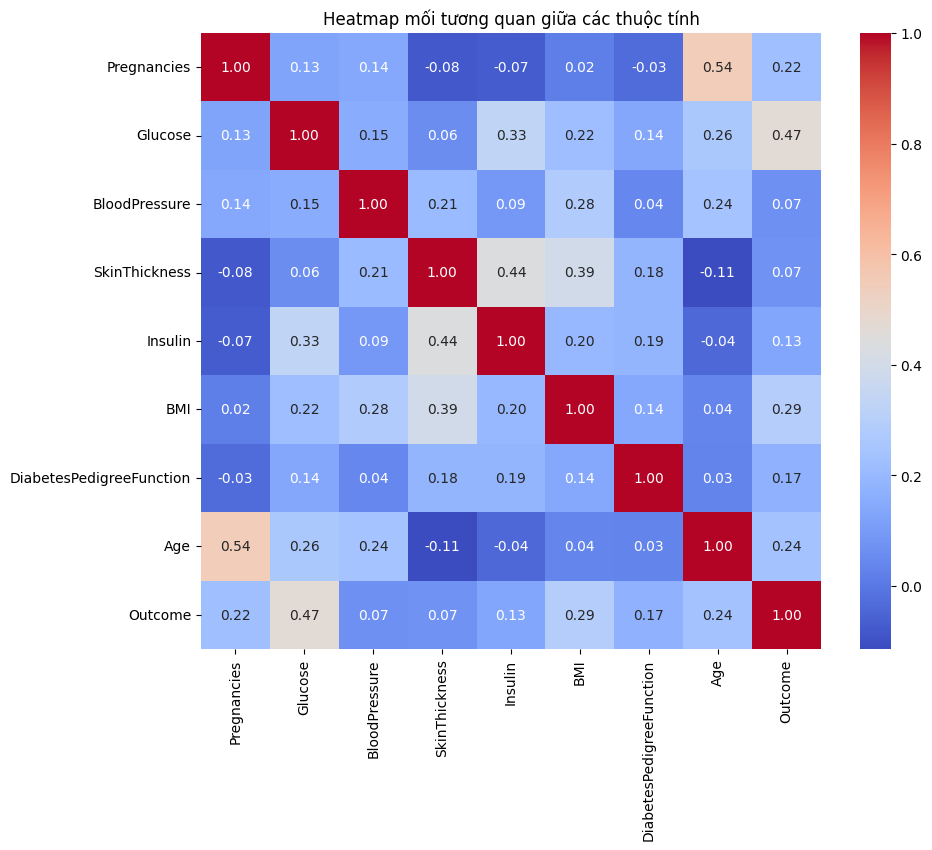

In [ ]:
#  Mối tương quan giữa các thuộc tính
plt.figure(figsize=(10,8))
corr = df_dataset.corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap mối tương quan giữa các thuộc tính")
plt.show()


In [ ]:
# Tính ma trận tương quan Pearson
correlations = df_dataset.corr(method='pearson')
display(correlations)

# Tìm các cặp có |r| > 0.5 để nhận xét
strong_corrs = []
for i in range(len(correlations.columns)):
    for j in range(i+1, len(correlations.columns)):
        r = correlations.iloc[i, j]
        if abs(r) > 0.5:
            strong_corrs.append((correlations.columns[i], correlations.columns[j], r))

print("Các cặp thuộc tính có độ tương quan cao (|r| > 0.5):")
for c1, c2, r in strong_corrs:
    print(f"- ({c1}, {c2}) = {r:.3f}")


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Các cặp thuộc tính có độ tương quan cao (|r| > 0.5):
- (Pregnancies, Age) = 0.544


**Nhận xét**
1. Một số cặp có tương quan khá cao:
- Glucose ↔ Outcome (~0.47–0.50) → mức glucose cao thường liên quan đến khả năng mắc tiểu đường.
- BMI ↔ SkinThickness (~0.65) → cả hai đều phản ánh tình trạng mỡ cơ thể.
- Insulin ↔ SkinThickness (~0.60) → có sự liên quan về mặt sinh học.
2. Các thuộc tính khác đa phần có tương quan thấp, không gây dư thừa thông tin.

**3.2 Hiển thị dữ liệu (Visualize Data)**

**(1) Hiển thị trên từng tính chất đơn (Univariate Plots)**

**Box and Whisker plots (Boxplot)**


1.   Dùng để so sánh trung vị (median), độ phân tán và ngoại lệ (outliers) của từng thuộc tính.
2.   Kiểm tra độ lệch phân phối:
- Median ở giữa hộp → phân phối gần đối xứng.
- Median lệch lên trên/dưới → phân phối lệch phải/trái.
3. Với bộ Pima, boxplot giúp nhận diện nhanh các cột hay có ngoại lệ như Insulin, SkinThickness và độ lệch ở Glucose, BMI.

**Histogram**


1.   Cho thấy dạng phân phối (chuông, lệch phải/trái), khoảng giá trị xuất hiện nhiều/ít.
2.   Hữu ích để phát hiện giá trị 0 bất thường (thường xem như thiếu dữ liệu ở Glucose/BloodPressure/SkinThickness/Insulin/BMI).




/tmp/ipython-input-305749135.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_dataset[c].values for c in numeric_cols], labels=numeric_cols, vert=True, showmeans=True)


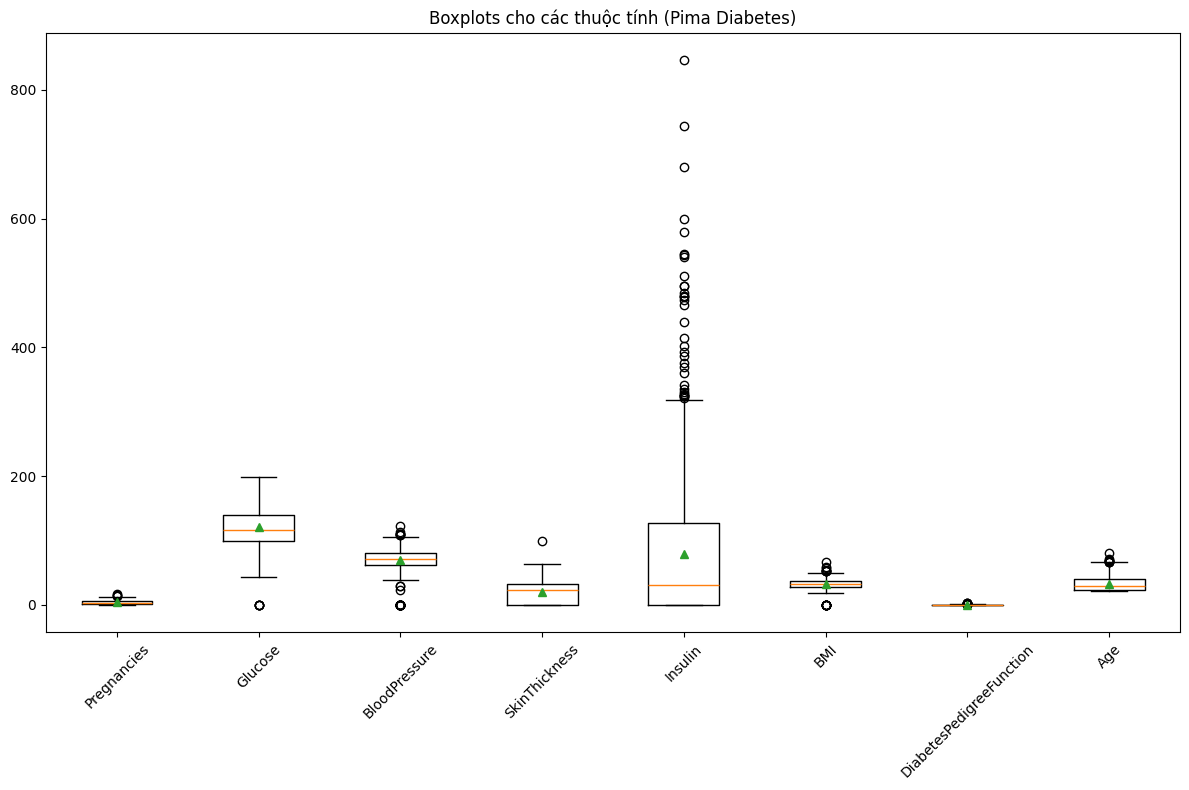

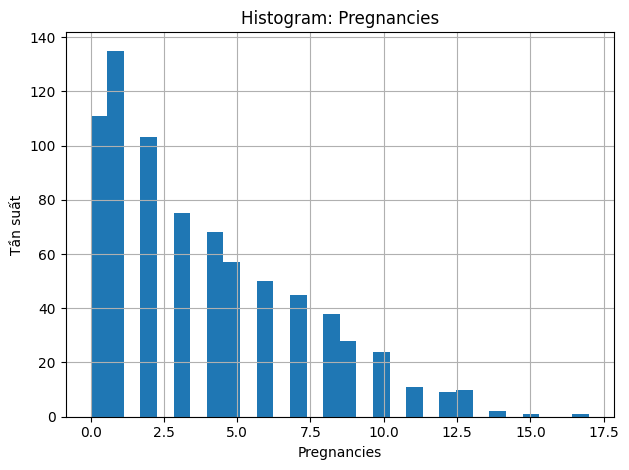

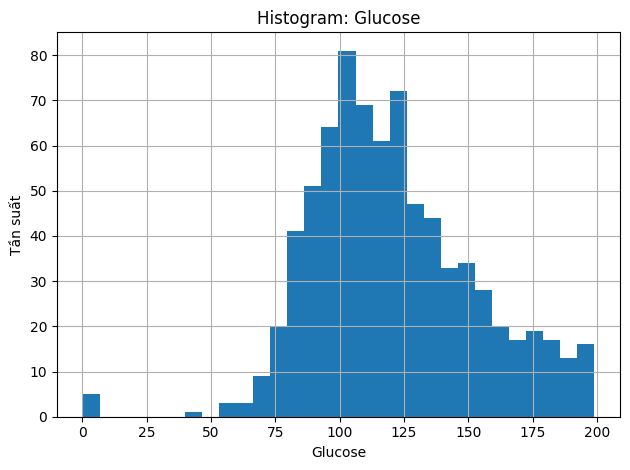

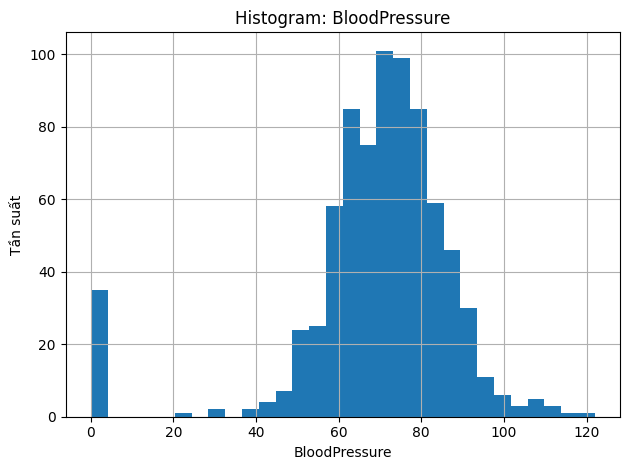

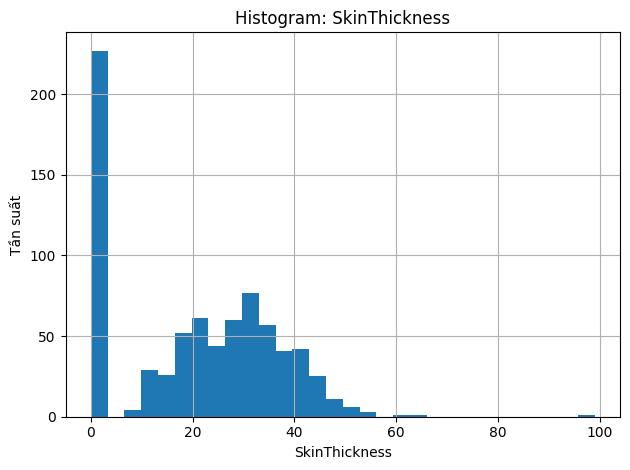

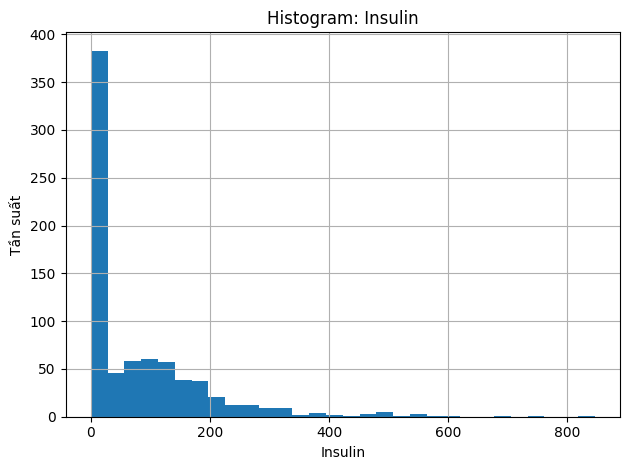

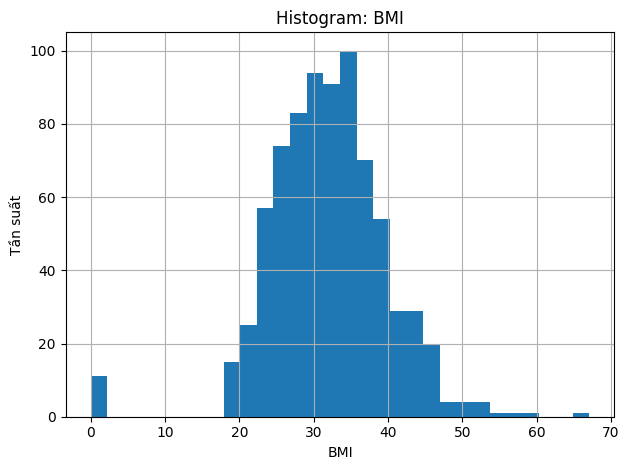

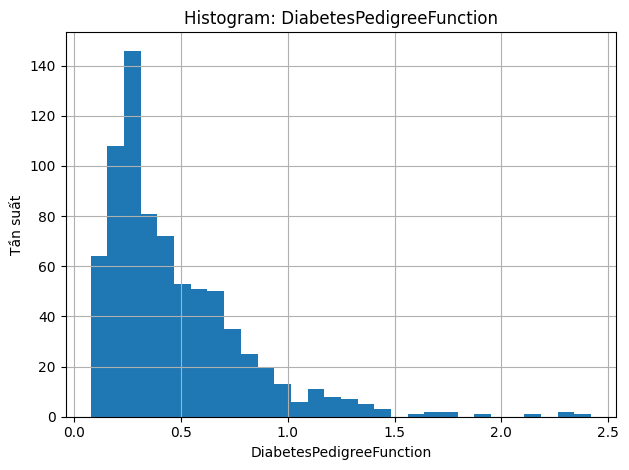

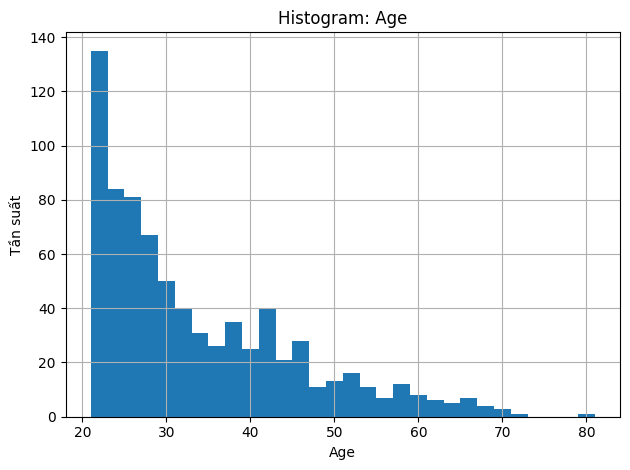

In [ ]:
numeric_cols = [c for c in df_dataset.columns if c != "Outcome"]

# Boxplots
plt.figure(figsize=(12, 8))
plt.boxplot([df_dataset[c].values for c in numeric_cols], labels=numeric_cols, vert=True, showmeans=True)
plt.title("Boxplots cho các thuộc tính (Pima Diabetes)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Histograms cho từng cột
for c in numeric_cols:
    plt.figure()
    df_dataset[c].hist(bins=30)
    plt.title(f"Histogram: {c}")
    plt.xlabel(c)
    plt.ylabel("Tần suất")
    plt.tight_layout()
    plt.show()

**Nhận xét**
- Glucose và BMI thường lệch phải; median cao hơn giữa hộp.
- Insulin có nhiều ngoại lệ (đuôi phải dài).
- SkinThickness phân tán vừa, có thể có outliers.
- Pregnancies và Age kéo dài về bên phải (nhiều giá trị nhỏ, ít giá trị lớn).
- Cần cân nhắc xử lý 0 → NaN và/hoặc chuẩn hóa trước khi huấn luyện.

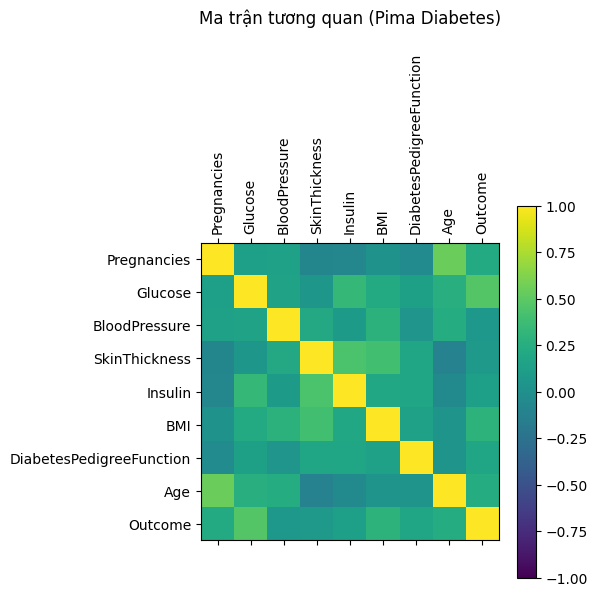

In [ ]:
correlations = df_dataset.corr()

plt.matshow(correlations, vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(np.arange(0, len(df_dataset.columns)), rotation=90)
plt.yticks(np.arange(0, len(df_dataset.columns)), rotation=0)
plt.gca().set_xticklabels(df_dataset.columns)
plt.gca().set_yticklabels(df_dataset.columns)
plt.title("Ma trận tương quan (Pima Diabetes)", pad=20)
plt.show()


**4. Chuẩn bị dữ liệu (Prepare Data)**

**4.1. Làm sạch dữ liệu (Data Cleaning)**

(1) Tạo bảng dữ liệu làm sạch
- Chỉ giữ lại các cột đầu vào (Pregnancies … Age) và nhãn đầu ra (Outcome).

In [ ]:
df_clean = df_dataset.copy()

(2) Kiểm tra và xóa dữ liệu trùng nhau

In [ ]:
# Hiển thị các dòng trùng nhau (nếu có)
display(df_clean[df_clean.duplicated()])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


(3) Kiểm tra Null/NaN

In [ ]:
has_null = df_clean.isnull().sum().any()
has_nan  = df_clean.isna().sum().any()
print(f"+ Có giá trị Null: {has_null}")
if has_null:
    display(df_clean[df_clean.isnull().any(axis=1)])

print(f"+ Có giá trị NaN: {has_nan}")
if has_nan:
    display(df_clean[df_clean.isna().any(axis=1)])


+ Có giá trị Null: False
+ Có giá trị NaN: False


(4) Kiểm tra “0 bất hợp lý”

In [ ]:
cols_zero_as_missing = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
cols_zero_as_missing = [c for c in cols_zero_as_missing if c in df_clean.columns]

print("Số lượng giá trị 0 (nghi ngờ missing):")
for c in cols_zero_as_missing:
    print(f"- {c}: {(df_clean[c] == 0).sum()}")


Số lượng giá trị 0 (nghi ngờ missing):
- Glucose: 5
- BloodPressure: 35
- SkinThickness: 227
- Insulin: 374
- BMI: 11


**4.2. Biến đổi dữ liệu (Data Transforms)**

**(1) Chuyển đổi dữ liệu danh mục (Category) thành dữ liệu số**

In [ ]:
print("Các giá trị trong Outcome:", df_clean["Outcome"].unique())


Các giá trị trong Outcome: [1 0]


In [ ]:
from sklearn.preprocessing import LabelEncoder


class_encoder = LabelEncoder()
class_encoder.fit(df_clean["Outcome"])
class_names = class_encoder.classes_
print("Tên các lớp:", class_names)

# Biến đổi Outcome thành nhãn số
df_clean["Outcome"] = class_encoder.transform(df_clean["Outcome"])
df_clean.head()


Tên các lớp: [0 1]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Example**

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd


df_example = pd.DataFrame({
    "Country":  ["France","Spain","Germany","Spain","Germany","France","Spain","France","Germany","France"],
    "Age":      [44,27,30,38,40,35,0,48,50,37],
    "Salary":   [72000,48000,54000,61000,61000,58000,52000,79000,83000,67000],
    "Purchased":["No","Yes","No","No","Yes","Yes","No","Yes","No","Yes"]
})

purchased_encoder = LabelEncoder()
purchased_encoder.fit(df_example["Purchased"])

print(purchased_encoder.classes_)                       # ['No' 'Yes']
print(purchased_encoder.transform(df_example["Purchased"]))  # mảng 0/1

df_example["Purchased"] = purchased_encoder.transform(df_example["Purchased"])
df_example


['No' 'Yes']
[0 1 0 0 1 1 0 1 0 1]


,Country,Age,Salary,Purchased
0,France,44,72000,0
1,Spain,27,48000,1
2,Germany,30,54000,0
3,Spain,38,61000,0
4,Germany,40,61000,1
5,France,35,58000,1
6,Spain,0,52000,0
7,France,48,79000,1
8,Germany,50,83000,0
9,France,37,67000,1


**(2) Chuyển đổi dữ liệu danh mục (Category) thành dạng OneHot**

Một số thuật toán khi chuyển đổi cột dạng danh mục thành kiểu OneHot thì cho hiệu suất cao hơn.
Bên cạnh đó, khi huấn luyện mô hình với dạng hàm mất mát CategoryEntropy thì cũng cần chuyển thuộc tính phân lớp sang dạng OneHot.

**Exmaple**

In [ ]:
df_country_onehot = pd.get_dummies(df_example["Country"])

# Ghép lại thành 1 bảng
df_result = pd.concat([df_example, df_country_onehot], axis=1)
print("\nSau khi mã hóa:")
print(df_result)


Sau khi mã hóa:
   Country  Age  Salary  Purchased  France  Germany  Spain
0   France   44   72000          0    True    False  False
1    Spain   27   48000          1   False    False   True
2  Germany   30   54000          0   False     True  False
3    Spain   38   61000          0   False    False   True
4  Germany   40   61000          1   False     True  False
5   France   35   58000          1    True    False  False
6    Spain    0   52000          0   False    False   True
7   France   48   79000          1    True    False  False
8  Germany   50   83000          0   False     True  False
9   France   37   67000          1    True    False  False


In [ ]:

df_example = pd.DataFrame({
    "Country": ["France", "Spain", "Germany", "Spain", "Germany",
                "France", "Spain", "France", "Germany", "France"]
})
# One-Hot Encoding cho cột Country
df_contry_onehot = pd.get_dummies(df_example["Country"])

# Đặt lại tên cột cho rõ ràng
df_contry_onehot = pd.DataFrame(
    df_contry_onehot.values,
    columns=["Is_France", "Is_Germany", "Is_Spain"]
)

print(df_contry_onehot)


   Is_France  Is_Germany  Is_Spain
0       True       False     False
1      False       False      True
2      False        True     False
3      False       False      True
4      False        True     False
5       True       False     False
6      False       False      True
7       True       False     False
8      False        True     False
9       True       False     False


In [ ]:
import pandas as pd

# Ví dụ dữ liệu ban đầu
df_example = pd.DataFrame({
    "Country": ["France", "Spain", "Germany", "Spain", "Germany",
                "France", "Spain", "France", "Germany", "France"],
    "Age": [44, 27, 30, 38, 40, 35, 0, 48, 50, 37],
    "Salary": [72000, 48000, 54000, 61000, 61000, 58000, 52000, 79000, 83000, 67000],
    "Purchased": [0, 1, 0, 0, 1, 1, 0, 1, 0, 1]
})

# One-Hot Encoding cho cột Country
df_contry_onehot = pd.get_dummies(df_example["Country"])

# Đặt lại tên cột cho rõ ràng
df_contry_onehot = pd.DataFrame(
    df_contry_onehot.values,
    columns=["Is_France", "Is_Germany", "Is_Spain"]
)

# Xóa cột Country gốc và ghép One-Hot vào dataset
df_example = df_example.drop("Country", axis=1)
df_example = df_contry_onehot.join(df_example)

df_example




,Is_France,Is_Germany,Is_Spain,Age,Salary,Purchased
0,True,False,False,44,72000,0
1,False,False,True,27,48000,1
2,False,True,False,30,54000,0
3,False,False,True,38,61000,0
4,False,True,False,40,61000,1
5,True,False,False,35,58000,1
6,False,False,True,0,52000,0
7,True,False,False,48,79000,1
8,False,True,False,50,83000,0
9,True,False,False,37,67000,1


#### (3) Chuẩn hóa dữ liệu (Data Normalize)

Chuẩn hóa các tính chất để đưa về cùng một miền trị
+ Min-Max Normalization
$$
z = \frac{x - min(x)}{max(x) - min(x)}
$$
+ Standard Normalization
$$
z = \frac{x - \mu}{\sigma}
$$

**Lưu ý**: Quá trình chuẩn hóa có thể làm trong phần thực nghiệm thuật toán

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Nếu bạn chưa có df_clean, dùng tạm bản sao từ df_dataset
try:
    df_clean
except NameError:
    df_clean = df_dataset.copy()

# Các cột cần scale (tất cả feature, giữ nguyên nhãn Outcome)
scale_columns = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
    "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"
]

minmax_scaler = MinMaxScaler()
minmax_scaler.fit(df_clean[scale_columns])

df_clean_minmax = df_clean.copy()
df_clean_minmax[scale_columns] = minmax_scaler.transform(df_clean[scale_columns])

# Xem kết quả sau chuẩn hóa (0..1) – Outcome giữ nguyên
df_clean_minmax


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1


<Axes: >

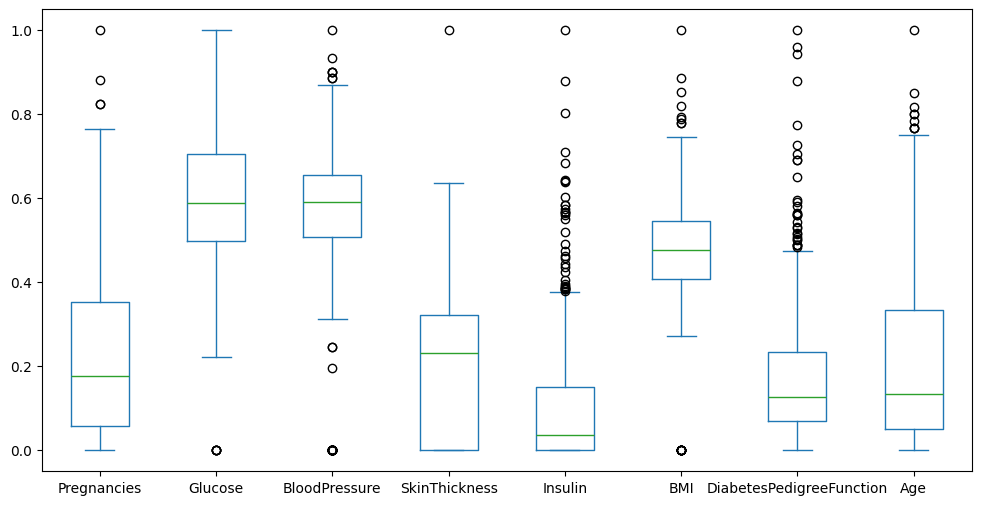

In [ ]:
# Vẽ Boxplot cho các cột đã scale của Pima Diabetes
df_clean_minmax[scale_columns].plot(kind="box", figsize=(12,6))


In [ ]:
scale_columns = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
    "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"
]


In [ ]:
from sklearn.preprocessing import StandardScaler

# Các cột cần chuẩn hóa (trừ cột nhãn Outcome)
scale_columns = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
    "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"
]

standard_scaler = StandardScaler()
standard_scaler.fit(df_clean[scale_columns])

df_clean_standard = df_clean.copy()
df_clean_standard[scale_columns] = standard_scaler.transform(df_clean[scale_columns])

# Xem kết quả
df_clean_standard


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,0
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,0
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,0
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1


<Axes: >

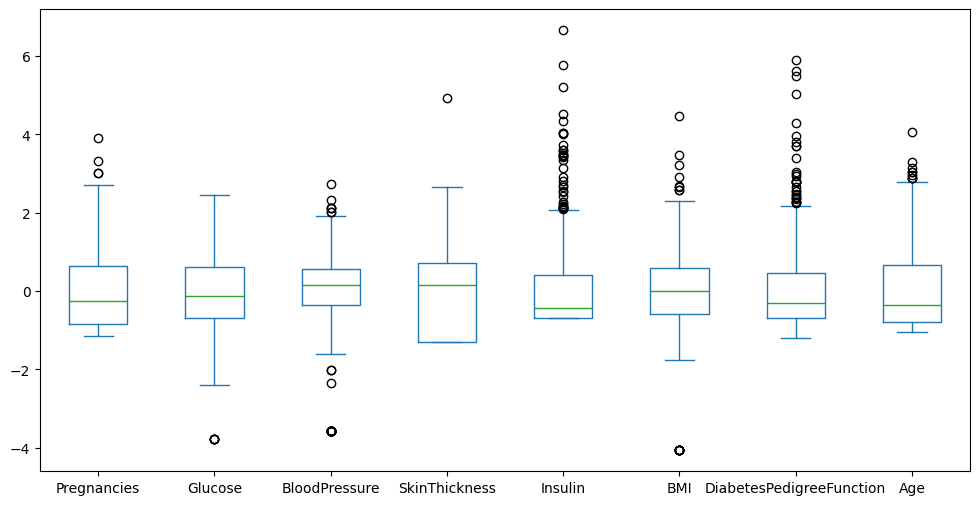

In [ ]:
# Vẽ Boxplot cho dữ liệu sau StandardScaler
df_clean_standard[scale_columns].plot(kind="box", figsize=(12,6))


In [ ]:
# Tính toán ma trận tương quan Pearson
correlations = df_clean_standard.corr(method='pearson')

# Hiển thị ma trận
import pandas as pd
display(correlations)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


#### (4) Chia dữ liệu thực nghiệm

+ Chuyển đổi dữ liệu sang dạng numpy với phần Input (X_data), Output (y_data)
+ Chia dữ liệu thành tập train/test (tỷ lệ 70/30)
+ Lưu tất cả thông tin để chuẩn bị chạy thuật toán

In [ ]:
X_data, y_data = df_clean.values[:, :-1], df_clean.values[:, -1]
X_data.shape, y_data.shape
print(X_data[:20, :])
print(y_data[:20])


[[6.000e+00 1.480e+02 7.200e+01 3.500e+01 0.000e+00 3.360e+01 6.270e-01
  5.000e+01]
 [1.000e+00 8.500e+01 6.600e+01 2.900e+01 0.000e+00 2.660e+01 3.510e-01
  3.100e+01]
 [8.000e+00 1.830e+02 6.400e+01 0.000e+00 0.000e+00 2.330e+01 6.720e-01
  3.200e+01]
 [1.000e+00 8.900e+01 6.600e+01 2.300e+01 9.400e+01 2.810e+01 1.670e-01
  2.100e+01]
 [0.000e+00 1.370e+02 4.000e+01 3.500e+01 1.680e+02 4.310e+01 2.288e+00
  3.300e+01]
 [5.000e+00 1.160e+02 7.400e+01 0.000e+00 0.000e+00 2.560e+01 2.010e-01
  3.000e+01]
 [3.000e+00 7.800e+01 5.000e+01 3.200e+01 8.800e+01 3.100e+01 2.480e-01
  2.600e+01]
 [1.000e+01 1.150e+02 0.000e+00 0.000e+00 0.000e+00 3.530e+01 1.340e-01
  2.900e+01]
 [2.000e+00 1.970e+02 7.000e+01 4.500e+01 5.430e+02 3.050e+01 1.580e-01
  5.300e+01]
 [8.000e+00 1.250e+02 9.600e+01 0.000e+00 0.000e+00 0.000e+00 2.320e-01
  5.400e+01]
 [4.000e+00 1.100e+02 9.200e+01 0.000e+00 0.000e+00 3.760e+01 1.910e-01
  3.000e+01]
 [1.000e+01 1.680e+02 7.400e+01 0.000e+00 0.000e+00 3.800e+01 5.3

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, train_size=0.7
)

print(f'+ Train/Test: Train Ratio = {len(X_train)/len(X_data)}')
print(f'+ Train: shape={X_train.shape}\nInput = \n{X_train[:5]}\nOutput = {y_train[:5]}')
print(f'+ Test: shape={X_test.shape}\nInput = \n{X_test[:5]}\nOutput = {y_test[:5]}')


+ Train/Test: Train Ratio = 0.69921875
+ Train: shape=(537, 8)
Input = 
[[4.00e+00 1.17e+02 6.40e+01 2.70e+01 1.20e+02 3.32e+01 2.30e-01 2.40e+01]
 [3.00e+00 1.03e+02 7.20e+01 3.00e+01 1.52e+02 2.76e+01 7.30e-01 2.70e+01]
 [6.00e+00 1.37e+02 6.10e+01 0.00e+00 0.00e+00 2.42e+01 1.51e-01 5.50e+01]
 [6.00e+00 1.17e+02 9.60e+01 0.00e+00 0.00e+00 2.87e+01 1.57e-01 3.00e+01]
 [2.00e+00 8.10e+01 7.20e+01 1.50e+01 7.60e+01 3.01e+01 5.47e-01 2.50e+01]]
Output = [0. 0. 0. 0. 0.]
+ Test: shape=(231, 8)
Input = 
[[ 13.    104.     72.      0.      0.     31.2     0.465  38.   ]
 [  7.    142.     60.     33.    190.     28.8     0.687  61.   ]
 [  1.    130.     70.     13.    105.     25.9     0.472  22.   ]
 [  2.    119.      0.      0.      0.     19.6     0.832  72.   ]
 [  1.    164.     82.     43.     67.     32.8     0.341  50.   ]]
Output = [1. 0. 0. 0. 0.]


In [ ]:
import os
import numpy as np
import joblib

# Lưu thông tin
save_dir = "exps/iris"
if os.path.exists(save_dir) == False:
    os.makedirs(save_dir)

# Save training data (train/test)
np.savez(f'{save_dir}/data.npz',
         X_train=X_train,
         X_test=X_test,
         y_train=y_train,
         y_test=y_test)

# Save cleaning data (to Excel)
df_clean.to_excel(f'{save_dir}/df_clean.xlsx', index=False)

# Save encoders (LabelEncoder)
joblib.dump(class_encoder, f'{save_dir}/class_encoder.joblib')

# Kiểm tra các file trong thư mục
os.listdir(save_dir)


['df_clean.xlsx', 'data.npz', 'class_encoder.joblib']

In [ ]:
# ===== LƯU DỮ LIỆU (Pima) =====
import os, numpy as np, pandas as pd

save_dir = "exps/pima"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# 1) Lưu train/test (numpy .npz)
np.savez(f"{save_dir}/data.npz",
         X_train=X_train, X_test=X_test,
         y_train=y_train, y_test=y_test)

# 2) Lưu bảng dữ liệu sạch ra Excel
df_clean.to_excel(f"{save_dir}/df_clean.xlsx", index=False)

# 3) Kiểm tra file trong thư mục
print("Files:", os.listdir(save_dir))


Files: ['df_clean.xlsx', 'data.npz']


In [ ]:

npz_keys = dict(np.load(f"{save_dir}/data.npz")).keys()
print("NPZ keys:", list(npz_keys))       # ['X_train','X_test','y_train','y_test']

df_clean_reload = pd.read_excel(f"{save_dir}/df_clean.xlsx")
df_clean_reload.head()


NPZ keys: ['X_train', 'X_test', 'y_train', 'y_test']


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
print("Shape:", df_clean_reload.shape)


Shape: (768, 9)


#Kết thúc
